<a href="https://colab.research.google.com/github/Prajaktahz/Uni_Colab_Work/blob/main/FBA_Week_09_Python_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://www.cs.nott.ac.uk/~pszgss/teaching/nlab.png)
# FBA Tutorial 9 - Sklearn II & Plotting

As in the previous tutorial, we will be using the **admissions.csv** file (available from the moodle page). This file describes people who are applying for a postgraduate degree at a US university, and indicates 3 relevant features about an applicant… as well as whether they got into to the masters or PhD course they were applying for when they were selected by hand (note that if we were doing a full analytics project, this would be our target class!):

* The dataset has a binary output feature (i.e. dependent variable) called "admit".
* There are three predictor variables: gre, gpa and ranking.
* Variables gre (a exam result score) and gpa (the person's grade point average) are continuous.
* The variable ranking takes on the values 1 through 4. Institutions with a rank of 1 have the highest prestige, while those with a rank of 4 have the lowest.

In [1]:
!wget -O week9_data.zip "https://drive.google.com/uc?export=download&id=1dVOeQ48ciZ-zG0k53OzXBAG44La-jI7D"
!unzip week9_data.zip

--2023-11-27 09:50:58--  https://drive.google.com/uc?export=download&id=1dVOeQ48ciZ-zG0k53OzXBAG44La-jI7D
Resolving drive.google.com (drive.google.com)... 108.177.96.138, 108.177.96.139, 108.177.96.102, ...
Connecting to drive.google.com (drive.google.com)|108.177.96.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-10-80-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/42r27vrjvo4kr3snouvecai2sspgumjf/1701078600000/02584936932483403665/*/1dVOeQ48ciZ-zG0k53OzXBAG44La-jI7D?e=download&uuid=e590a188-33e3-437a-9555-c71f2d8b4f62 [following]
--2023-11-27 09:50:59--  https://doc-10-80-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/42r27vrjvo4kr3snouvecai2sspgumjf/1701078600000/02584936932483403665/*/1dVOeQ48ciZ-zG0k53OzXBAG44La-jI7D?e=download&uuid=e590a188-33e3-437a-9555-c71f2d8b4f62
Resolving doc-10-80-docs.googleusercontent.com (doc-10-80-docs.googleusercontent.com)... 142.250.153.132, 2a00

## Section A

Let's repeat what we did last time using Pandas:


In [2]:
import pandas as pd
df = pd.read_csv('admissions.csv')
df.head(5)

,admit,gre,gpa,ranking
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


And updating the values of the column admit:

In [3]:
df.loc[df.admit == 1, 'admit'] = True
df.loc[df.admit == 0, 'admit'] = False
df.head()

,admit,gre,gpa,ranking
0,False,380,3.61,3
1,True,660,3.67,3
2,True,800,4.00,1
3,True,640,3.19,4
4,False,520,2.93,4


Finally, we really want to show how each feature’s values differ for one class compared to the other (this would be useful for example, in a coursework to investigate who buy a product and who don’t)

Let’s do this now by separating the positives (admitted - True) from the negatives (rejected - False) in our dataset. Using pandas filtering, assign to a variable pos the dataframe of students who were admitted and to a variable neg the students that were rejected.

In [6]:
# your code here
pos = df[df.admit == True]
neg = df[df.admit == False]

What this means is that we now can print summary statistics to compare between successful and unsuccessful applicants using the **describe( )** method on the two separate dataframes.

In [7]:
pos.describe()

,gre,gpa,ranking
count,127.000000,127.000000,127.000000
mean,618.897638,3.489213,2.149606
std,108.884884,0.370177,0.917889
min,300.000000,2.420000,1.000000
25%,540.000000,3.220000,1.000000
50%,620.000000,3.540000,2.000000
75%,680.000000,3.755000,3.000000
max,800.000000,4.000000,4.000000


In [8]:
neg.describe()

,gre,gpa,ranking
count,273.000000,273.000000,273.000000
mean,573.186813,3.343700,2.641026
std,115.830243,0.377133,0.917198
min,220.000000,2.260000,1.000000
25%,500.000000,3.080000,2.000000
50%,580.000000,3.340000,3.000000
75%,660.000000,3.610000,3.000000
max,800.000000,4.000000,4.000000


***Anything you would like to comment on concerning these comparisons between rejections and admissions as a feedback to a client?***

```Enter your comments here```

## Section B

This section focuses on the use of matplotlib.

### Step B1 - A picture is as good as a thousand words...

What is the best way to illustrate our data? Well, statistics are all good, but graphs are often better to demonstrate things you have found in your analyses. As I am speaking, dashboards are becoming more and more popular by throwing several graphs together (e.g., with the use of software, such as Tableau).

To start, “matplotlib”  library (and its extensions) makes well-known plots and their customization easy.

Let’s just see how we could make a bar chart comparing the number of datapoints which were positive and negative.
First, here is how we can do it the 'manual' way using matplotlib:

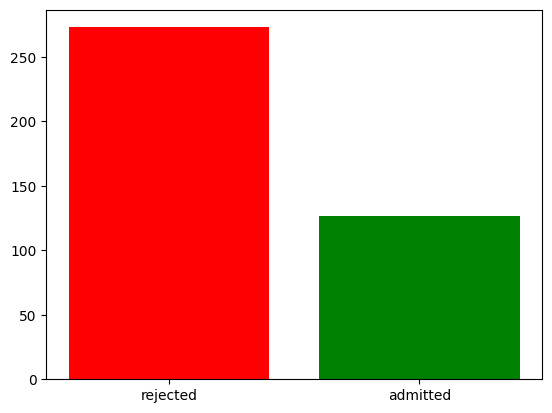

In [10]:
import matplotlib.pyplot as plt

labels = ['rejected', 'admitted']
values = [len(neg), len(pos)]
plt.bar([0, 1], values, align='center', color=['red', 'green'])
plt.xticks([0, 1], labels)
plt.show()

Well, that wasn't too bad… but it was several lines let's break what is going on here down line by line:
1. We import the matplotlib library (and call it “plt”) so we can use its functions.
2. We create a list of the labels for the bars.
3. We create a list of values for the bar's heights (in this case the number of items in each category).
4. We create the bar chart (at positions 0 and 1, aligning the bars to the centre and making them red and green in colour.
5. We add the bar's labels to the plot.
6. And finally we show the results on screen.

### Step B2 - Visualising the mean

Now let's create a bar chart for the mean gpa score for each class by copying and altering the code of the previous step.

You can compute the mean using either a Pandas method or a Numpy function.

In [41]:
# your code here
gpa_rank_1 = df[df.ranking == 1].gpa.mean()
gpa_rank_2 = df[df.ranking == 2].gpa.mean()
gpa_rank_3 = df[df.ranking == 3].gpa.mean()
gpa_rank_4 = df[df.ranking == 4].gpa.mean()

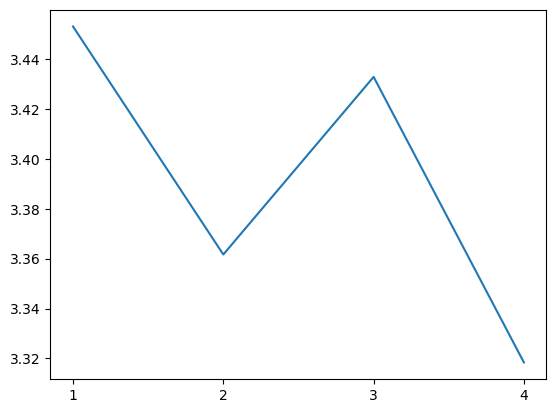

In [51]:
# label1 =  df.ranking.unique().tolist()
x = [1,2,3,4]
values = [gpa_rank_1, gpa_rank_2,gpa_rank_3,gpa_rank_4]
plt.plot(x,values)
plt.xticks([1, 2,3,4], labels)
plt.show()

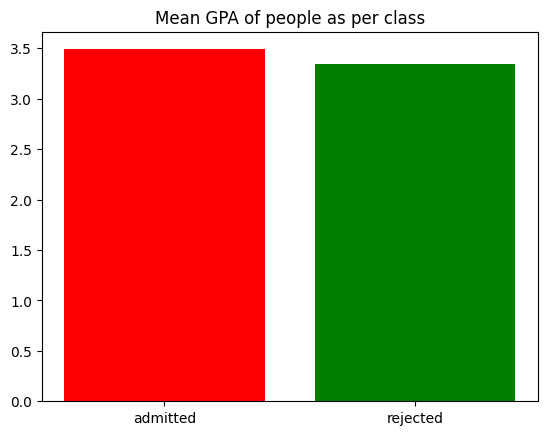

In [71]:
xlabels = ['admitted','rejected']
values = [np.mean(pos.gpa), np.mean(neg.gpa)]
plt.bar([0, 1], values, align='center', color=['red', 'green'])
plt.xticks([0, 1], xlabels)
plt.title('Mean GPA of people as per class')
plt.show()

### Step B3 - Visualising the variance

Create a bar chart for the variance score for each class (you might want to use numpy function np.var() to do this rather than square the standard deviation).

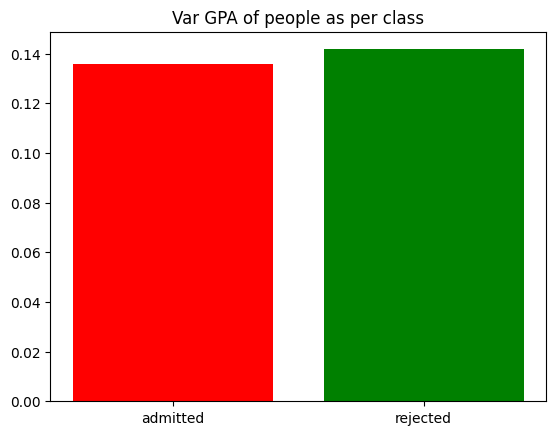

In [73]:
import numpy as np
x = ['admitted','rejected']
values = [np.var(pos.gpa), np.var(neg.gpa)]
plt.bar(x,values, align='center', color=['red', 'green'])
plt.title('Var GPA of people as per class')
plt.show()

Now, yes, these images still have a horrible grey background, and the fonts aren’t the most beautiful, but these are all editable. Take a look at the tutorials online for making beautiful matplotlib graphs (they are easy to cut and paste) if you get a chance.

However, we have a second option using this time the **seaborn** library.

## Section C

This section focuses on the use of Seaborn.

### Step C1 - Reproducing B1 in Seaborn

We want to reproduce the graph done at Step B1 using Seaborn this time. The first thing, as usual and as described in the lecture, is to import the necessary module(s).

Note that in this case, matplotlib.pyplot has already been imported for the previous questions so we don't need to re-import it.

In [54]:
import seaborn as sns

We can then produce the bar plot using the following code:

<Axes: xlabel='admit', ylabel='gpa'>

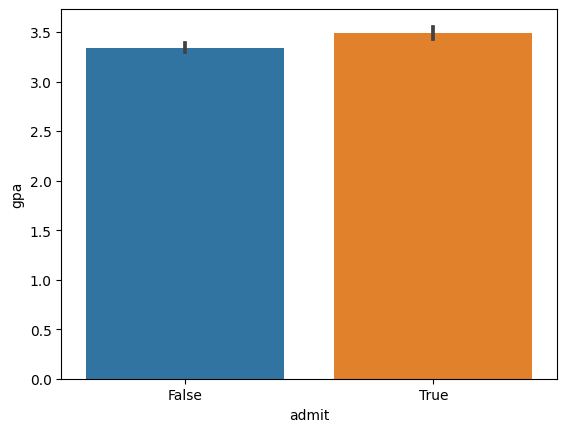

In [55]:
sns.barplot(x='admit', y='gpa', data=df)

# OR
#sns.barplot(data=[neg.gpa, pos.gpa])

### Step C2 - Styling the plot

Seaborn has a range of colour palettes (look them up on google). You can specify a palette by adding the following argument to your plotting code (in our case the call to the barplot function):

> palette = 'Set1'

But it also has lots of built in style’s for the whole graph. Let’s try one now by adding the following line before your barplot command:

> sns.set_style('whitegrid')

Rerun and you’ll see you now have a graph worth of using in a report. Feel free to take a look at some other options for these styles:
* darkgrid
* whitegrid
* dark
* white
* ticks

Try different styles to make the plot a bit prettier !

### Step C3 - Boxplots

Finally, let’s abandon bar charts all together. They are fine for just listing the counts of admissions here, but they will tell us very little information about our covariates - gpa scores, gre scores and university rankings. What we really want as analysts are box plots!

Copy the code from C1 and convert it to use boxplots instead. You can refer to the documentation to find how the boxplot function is used:

http://seaborn.pydata.org/generated/seaborn.boxplot.html#seaborn.boxplot


<Axes: xlabel='admit', ylabel='gpa'>

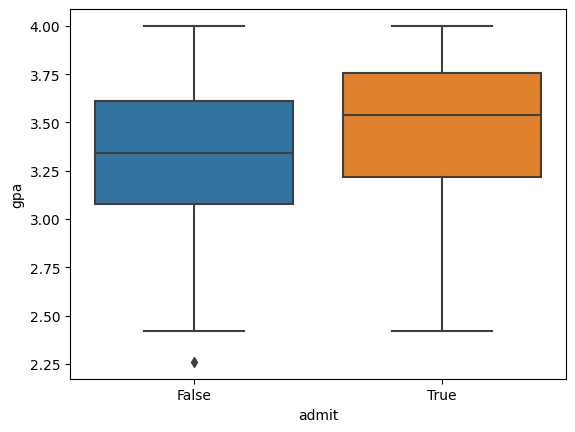

In [56]:
# your code here
sns.boxplot(x='admit', y='gpa', data=df)

Each solid box represents the second and third quartiles of the data indicating the spread/variance of the data, the horizontal line through each box is the median, and the vertical lines show the limits of the dataset. All useful stuff for interpretation.

That’s all there is to it for producing nice graphs. There’s a huge amount of options to play around with, and I recommend having a go on the different options for adding labels, changing fonts, using different palettes and so on (I’ll leave you to google the endless tutorials and documentation on matplotlib and seaborn at your leisure!)

*Having said that there is also a competitor to boxplots that’s worth noting in the form of violinplots*

### Step C4 - Violin Plots

Finally produce a violin plot for the GPA scores using the sns.violinplot() method. It’s as simple as changing the method name in your code. Once again, you can use the online documentation to find the different options available if you need further tweaking.

<Axes: xlabel='admit', ylabel='gpa'>

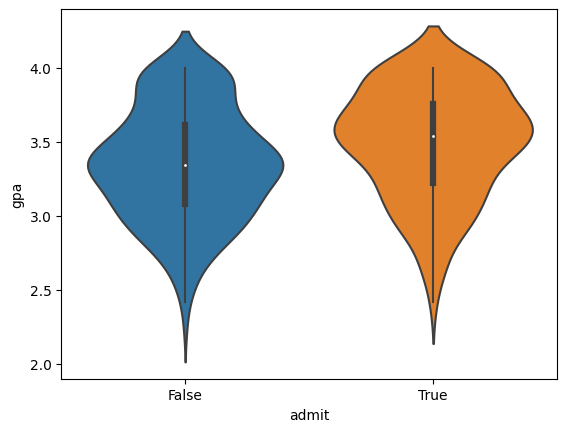

In [57]:
# your code here
sns.violinplot(x='admit', y='gpa', data=df)

Now we can see the exact distribution of the data. Not bad, but is it better? You decide.

## Section D

In this section we are going to focus on the relationship between GRE and GPA scores using visual tools.

In [58]:
# building a linear model like in week 7
from sklearn import linear_model
X = df[['gpa']]
Y = df[['gre']]
model = linear_model.LinearRegression()
model.fit(X,Y)
print(model.coef_, model.intercept_)

[[116.63935631]] [192.30424605]


### Step D1 - Matplotlib & Linear Regression

We can plot the regression line obtained on top of the data in matplotlib using the following code:

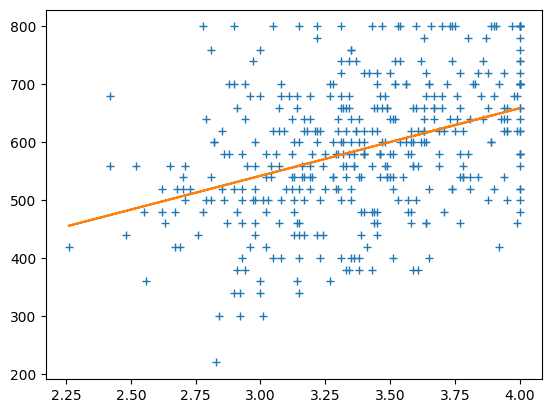

In [59]:
plt.plot(df.gpa, df.gre, '+')
lrline = model.coef_[0][0] * df.gpa + model.intercept_[0]
plt.plot(df.gpa, lrline)
#plt.show()

### Step D2 - Seaborn & Linear Regression

Try to obtain a similar visualisation using Seaborn and its lmplot() function. You can refer to the lecture slides and the online documentation of Seaborn to know more about its usage. Its a whole lot easier than the matplotlib code!

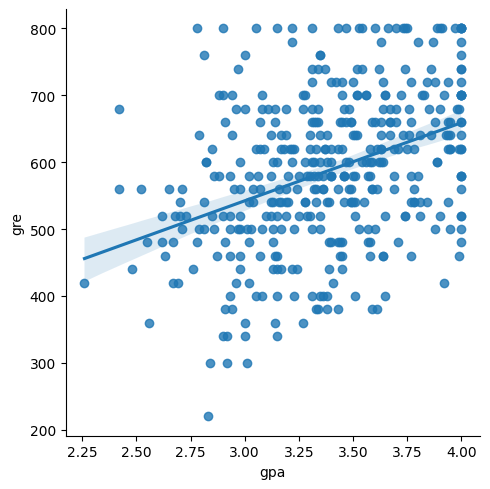

In [60]:
# your code here
sns.lmplot(data=df, x="gpa", y="gre")

### Step D3 - Seaborn & Pairwise relationship

Finally, using Seaborn's pairplot() function.

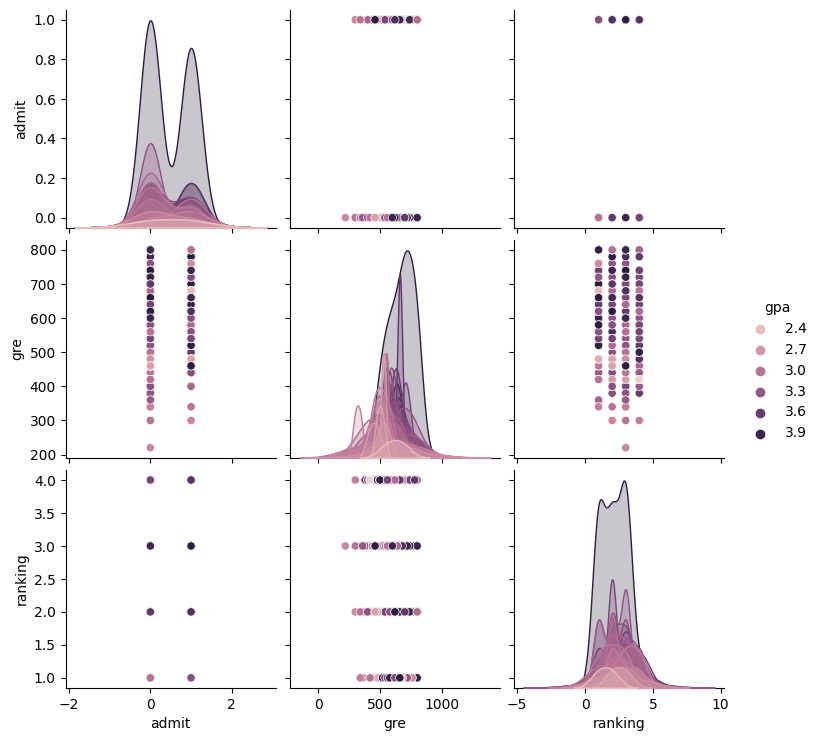

In [76]:
# your code here
sns.pairplot(df, hue="gpa")
plt.show()

### Additional Practice

If you are tired of this dataset and want to practice more, try to repeat some of the steps above on additional datasets, e.g., **national_school_data_2021.csv** in Moodle.

Or re-do the modelling in Python using datasets from previous weeks.

In [83]:
# building a linear model like in week 3
df_t = pd.read_csv('weekly_temperature_data.csv')
df_t.head()

,dates,Average daily temp (0F),Average daily admissions,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,08/01/2009 - 14/01/2009,37.80,10.428571,NaN,NaN,NaN
1,15/01/2009 - 21/01/2009,40.34,9.428571,NaN,NaN,NaN
2,29/01/2009 - 04/02/2009,34.14,10.000000,NaN,NaN,NaN
3,12/02/2009 - 18/02/2009,40.77,9.285714,NaN,NaN,NaN
4,12/03/2009 - 18/03/2009,46.43,8.285714,NaN,NaN,NaN


In [88]:
df_t.dropna(axis=1, how='all', inplace=True)

In [89]:
# clean the data from NaN
df_t.isna().sum()

dates                       94
Average daily temp (0F)     94
Average daily admissions    94
dtype: int64

In [90]:
df_t["Average daily temp (0F)"].fillna(df_t["Average daily temp (0F)"].median(), inplace=True)
df_t["Average daily admissions"].fillna(df_t["Average daily admissions"].median(), inplace=True)

In [ ]:
from sklearn import linear_model
X = df_t[['Average daily temp (0F)']]
Y = df_t[['Average daily admissions']]
linmod_t = linear_model.LinearRegression()
linmod_t.fit(X,Y)
print(linmod_t.coef_, linmod_t.intercept_)

### Bonus

Let's use Sklearn for
- Logistic Regression
- Decision Tree

We will continue using **admissions.csv**.

We are interested in predicting whether people got into to the masters or PhD course they were applying given three predictor variables: gre, gpa and ranking.

#### Logistic Regression

In [ ]:
df = pd.read_csv('admissions.csv')
X2 = df[['gpa','gre','ranking']]
Y2 = df['admit']

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Perform a 25/75 test/train split!

logmod = LogisticRegression()
logmod.fit(X2_train, Y2_train)
y2_pred = logmod.predict(X2_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(Y2_test, y2_pred)

#### Decision Tree

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
tremod = DecisionTreeClassifier(max_depth = 4, min_samples_leaf= 7, criterion = "entropy")
tremod.fit(X2_train, Y2_train)
y2_pred = tremod.predict(X2_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(Y2_test, y2_pred)

In [ ]:
tree.plot_tree(tremod)